In [38]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Starter_Code/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "Starter_Code/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combine=pd.merge(study_results,mouse_metadata,how = "left", on=["Mouse ID"])
# Display the data table for preview
mouse_study_combine.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Checking the number of mice.
number_of_mice = len(mouse_study_combine["Mouse ID"].unique())
number_of_mice

249

In [40]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

#*** *** IMPORTANT TO READ *** ***
#Method learnt and copied from below link and detail code has changed to solve this challenge:
#https://github.com/MuratCKoc/Pymaceuticals/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb

mouse_study_1 =mouse_study_combine.copy()
duplicate_ID = mouse_study_1.loc[mouse_study_1.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
information_duplicate_ID = mouse_study_combine.loc[mouse_study_combine["Mouse ID"] == "g989"]
information_duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#*** *** IMPORTANT TO READ *** ***
#*** *** Method learnt and copied from below link and detail code has changed to solve this challenge:
#*** *** https://github.com/MuratCKoc/Pymaceuticals/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb

clean_mouse_study_combine =mouse_study_combine[mouse_study_combine['Mouse ID'].isin(duplicate_ID)==False]
clean_mouse_study_combine.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
clean_number_of_mice = len(clean_mouse_study_combine["Mouse ID"].unique())
clean_number_of_mice 

248

In [42]:
#Summary Statistics 1
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

statistics_raw_data=mouse_study_combine.copy()
tumor_volume_mean=statistics_raw_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].mean()

tumor_volume_median=statistics_raw_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].median()
tumor_volume_variance=statistics_raw_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].var()
tumor_volume_sd=statistics_raw_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].std()
tumor_volume_SEM=statistics_raw_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"].sem()

statistics_summary = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean,
                                  "Median Tumor Volume": tumor_volume_median,
                                  "Tumor Volume Variance": tumor_volume_variance,
                                  "Tumor Volume Std. Dev.": tumor_volume_sd,
                                  "Tumor Volume Std. Err." : tumor_volume_SEM,
                                 
                                 })
statistics_summary.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [43]:
#Summary Statistics 2

# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

statistics_raw_data_2=mouse_study_combine.copy()

tumor_volume_statistics=statistics_raw_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"] \
                        .agg(["mean","median","var","std","sem"])

#*** *** IMPORTANT TO READ *** ***
#*** *** Method learnt and copied from below link and detail code has changed to solve this challenge:
#https://stackoverflow.com/questions/69242457/adding-a-header-description-section-to-a-dataframe-pandas-python

header = 'Tumor Volume (mm3)'
tumor_volume_statistics.columns = pd.MultiIndex.from_product([[header], tumor_volume_statistics.columns])
tumor_volume_statistics.head(10)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

<IPython.core.display.Javascript object>


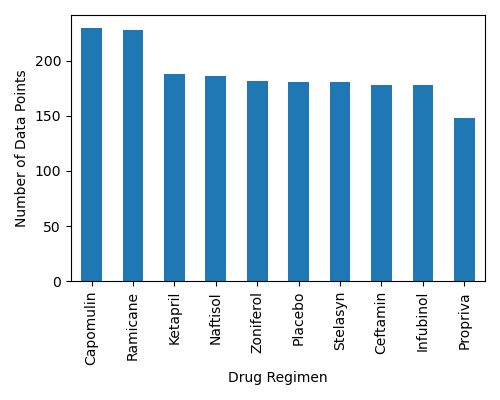

In [44]:
#Bar and Pie Charts
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

#*** *** IMPORTANT TO READ *** ***
#*** *** Method learnt and copied from below link and detail code has changed to solve this challenge:
#*** *** https://github.com/benanza/Pymaceuticals/blob/master/Pymaceuticals.ipynb

bar_plot = clean_mouse_study_combine['Drug Regimen'].value_counts().plot.bar(figsize=(5,4))

bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")

plt.tight_layout()


<IPython.core.display.Javascript object>


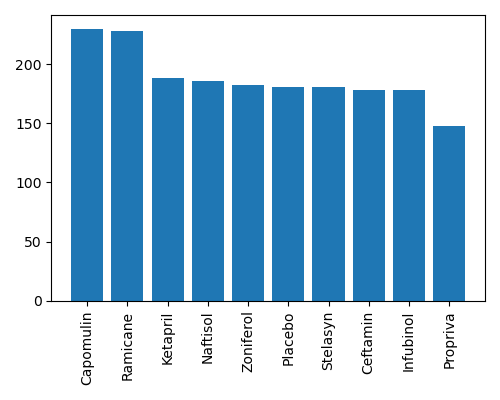

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#*** *** IMPORTANT TO READ *** ***
#*** *** Method learnt and copied from below link and detail code has changed to solve this challenge:
#*** *** https://github.com/benanza/Pymaceuticals/blob/master/Pymaceuticals.ipynb

raw_data_for_charts_py=clean_mouse_study_combine.copy()

number_mouse = raw_data_for_charts_py['Drug Regimen'].value_counts()

x_axis = np.arange(len(number_mouse))
tick_locations = [value for value in x_axis]
tick_locations

plt.figure(figsize=(5,4))
plt.bar(x_axis, number_mouse,align="center")
plt.xticks(tick_locations, number_mouse.index.values, rotation="vertical")
plt.tight_layout()


<IPython.core.display.Javascript object>


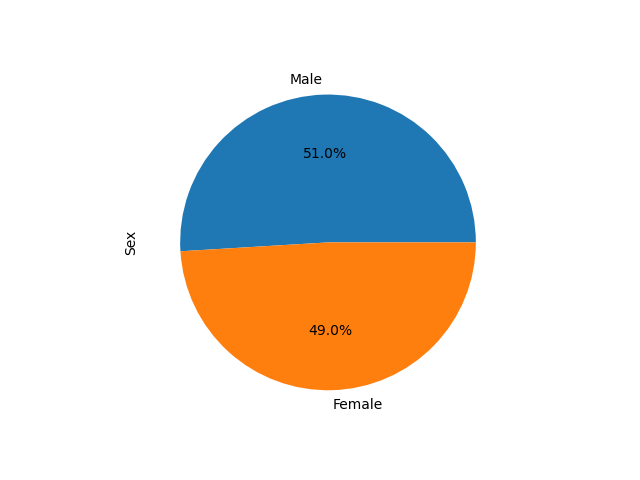

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#*** *** IMPORTANT TO READ *** ***
#*** *** Method learnt and copied from below link and detail code has changed to solve this challenge:
#*** *** https://github.com/MuratCKoc/Pymaceuticals/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb
raw_data_for_pie_charts_pd=clean_mouse_study_combine.copy()
mouse_sex_type = raw_data_for_pie_charts_pd['Sex'].value_counts()
mouse_sex_type.plot(kind='pie',y='',autopct='%1.1f%%')



<IPython.core.display.Javascript object>


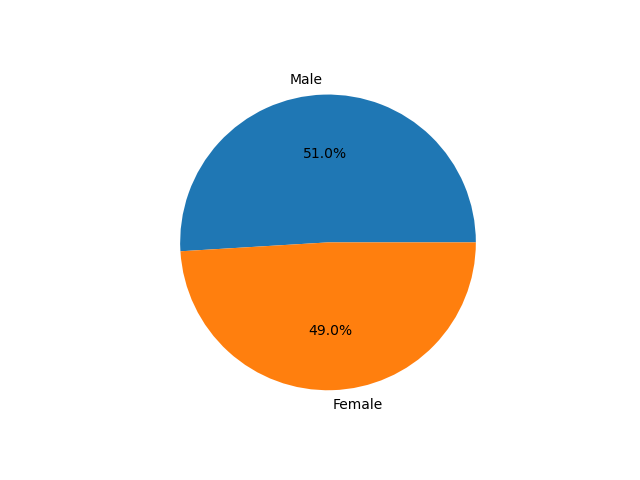

([<matplotlib.patches.Wedge at 0x28ff0551548>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

raw_data_for_pie_charts_py=clean_mouse_study_combine.copy()
mouse_sex_type_py = raw_data_for_pie_charts_pd['Sex'].value_counts()
plt.pie(mouse_sex_type_py,labels=mouse_sex_type_py.index.values,autopct="%1.1f%%")


In [48]:
#*** *** IMPORTANT TO READ *** ***
#*** *** Method learnt and copied from below link and detail code has changed to solve this challenge:
#*** *** https://github.com/MuratCKoc/Pymaceuticals/blob/master/Pymaceuticals/pymaceuticals_starter.ipynb

# Quartiles, Outliers and Boxplots
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

latest_timepoint = pd.DataFrame(mouse_study_combine.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'latest_timepoint'})

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
latest_timepoint_mousestudy = pd.merge(mouse_study_combine,latest_timepoint,on= "Mouse ID")
latest_timepoint_mousestudy


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),latest_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45
...,...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17,45
1889,m601,30,31.758275,1,Capomulin,Male,22,17,45
1890,m601,35,30.834357,1,Capomulin,Male,22,17,45
1891,m601,40,31.378045,1,Capomulin,Male,22,17,45


In [49]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

four_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug = []

for x in four_drug:
    
    four_drug_df = latest_timepoint_mousestudy.loc[latest_timepoint_mousestudy["Drug Regimen"] == x] 
    
    four_drug_latest_timepoint_mousestudy = four_drug_df.loc[four_drug_df['Timepoint'] == four_drug_df['latest_timepoint']]
    
    final_tumor_volume=four_drug_latest_timepoint_mousestudy["Tumor Volume (mm3)"]
  
    drug.append(final_tumor_volume)

    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
#     print(f'IQR for {x}: {iqr}')
    
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#     print(f'Lower Bound for {x}: {lower_bound}')
#     print(f'Upper Bound for {x}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (final_tumor_volume.loc[(four_drug_latest_timepoint_mousestudy['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (four_drug_latest_timepoint_mousestudy['Tumor Volume (mm3)'] <= lower_bound)])
    
    print(f'Number of {x} outliers: {outliers_count}')


  

Number of Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Number of Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Number of Infubinol outliers: 214    36.321346
Name: Tumor Volume (mm3), dtype: float64
Number of Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<IPython.core.display.Javascript object>


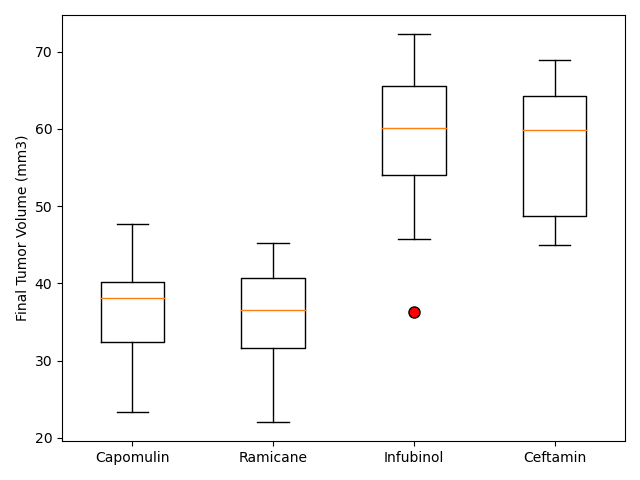

In [50]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#*** *** IMPORTANT TO READ *** ***
#*** *** Method learnt and copied from below link and detail code has changed to solve this challenge:
#*** *** https://github.com/benanza/Pymaceuticals/blob/master/Pymaceuticals.ipynb

outlier_format= dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(drug,flierprops=outlier_format)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()
plt.tight_layout()



<IPython.core.display.Javascript object>


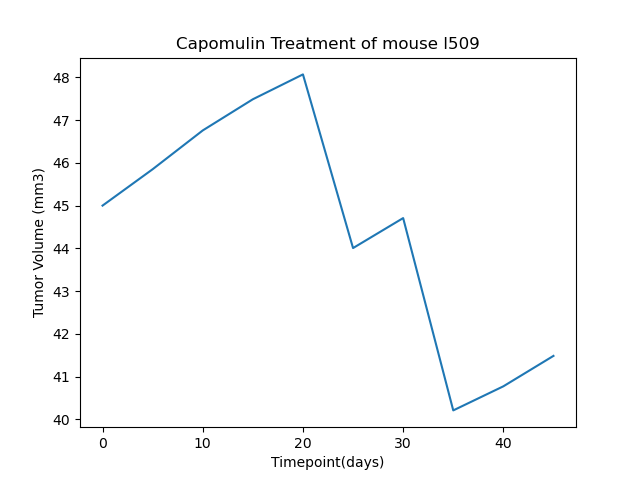

In [51]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
I509 = mouse_study_combine.loc[mouse_study_combine['Mouse ID'] == 'l509']
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of mouse l509")
plt.plot(I509['Timepoint'], I509['Tumor Volume (mm3)'])
plt.show()

<IPython.core.display.Javascript object>


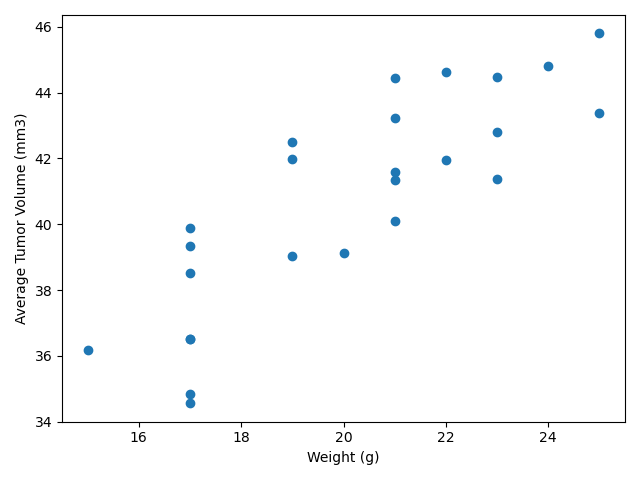

In [52]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#*** *** IMPORTANT TO READ *** ***
#*** *** Method learnt and copied from below link and detail code has changed to solve this challenge:
#*** *** https://github.com/benanza/Pymaceuticals/blob/master/Pymaceuticals.ipynb

capomulin = mouse_study_combine.loc[mouse_study_combine['Drug Regimen'] == 'Capomulin']
avg = pd.DataFrame(capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())\
.reset_index().rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})
avg


cap_avg= pd.merge(capomulin, avg, on='Mouse ID')

cap_avg_unique= cap_avg[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
cap_avg_unique

x = cap_avg_unique['Weight (g)']
y = cap_avg_unique['avg_tumor_vol']

plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.tight_layout()

<IPython.core.display.Javascript object>


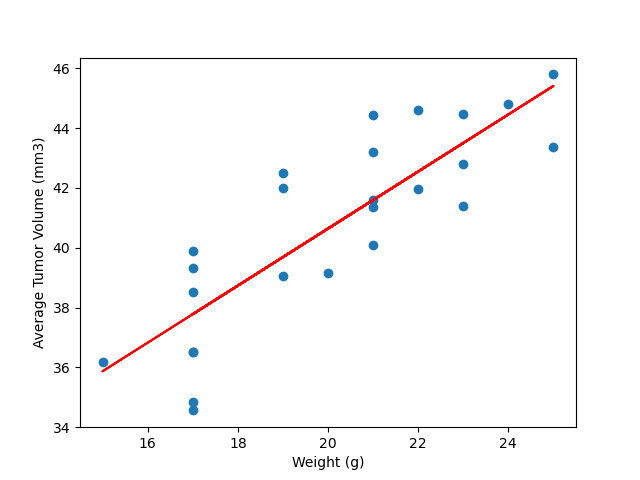

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

from scipy.stats import linregress

x = cap_avg_unique['Weight (g)']
y = cap_avg_unique['avg_tumor_vol']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()